<a href="https://colab.research.google.com/github/imammularif/Google-Colabs/blob/main/MEET_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Nama  : Imammul Arif
#####Nim   : 5190411243
#####Matkul : Big data dan data mining(D)

## NO.1

## A.Pengambilan Data

link dataset: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [ ]:
import pandas as pd

df = pd.read_csv('imdb_labelled.txt',sep='\t',names=['text','sentiment'])
df

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [ ]:
df['sentiment'] = df['sentiment'].replace(0,'negative')
df['sentiment'] = df['sentiment'].replace(1,'positive')
df

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",negative
1,Not sure who was more lost - the flat characte...,negative
2,Attempting artiness with black & white and cle...,negative
3,Very little music or anything to speak of.,negative
4,The best scene in the movie was when Gerardo i...,positive
...,...,...
743,I just got bored watching Jessice Lange take h...,negative
744,"Unfortunately, any virtue in this film's produ...",negative
745,"In a word, it is embarrassing.",negative
746,Exceptionally bad!,negative


## B. Preprocessing data

In [ ]:
import re

def preprocess(sentence):
  # 1. Casefolding - membuat teks menjadi huruf kecil semua/besar semua
  sentence = sentence.lower()
  # 2. Hapus selain alfabet
  sentence = re.sub(r'[^a-zA-Z]+',' ',sentence)
  return sentence

df['text_clean'] = df['text'].apply(lambda x: preprocess(x))
df

,text,sentiment,text_clean
0,"A very, very, very slow-moving, aimless movie ...",negative,a very very very slow moving aimless movie abo...
1,Not sure who was more lost - the flat characte...,negative,not sure who was more lost the flat characters...
2,Attempting artiness with black & white and cle...,negative,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,negative,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,positive,the best scene in the movie was when gerardo i...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,negative,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",negative,unfortunately any virtue in this film s produc...
745,"In a word, it is embarrassing.",negative,in a word it is embarrassing
746,Exceptionally bad!,negative,exceptionally bad


## C . Pembagian data latih dan data uji

In [ ]:
from sklearn.model_selection import train_test_split

feature = df['text_clean']
target = df['sentiment']

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=321)


## D. Taining

### D.1. VEKTORISASI

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tf = TfidfVectorizer().fit(x_train)
tf_data = tf.transform(x_train)

pd.DataFrame(tf_data.toarray(),columns=tf.get_feature_names_out())

,abandoned,ability,about,abroad,absolutely,abysmal,academy,accents,accessible,accused,...,yes,yet,you,young,younger,your,youthful,yun,zillion,zombie
0,0.0,0.0,0.017333,0.0,0.023014,0.0,0.0,0.0,0.0,0.0,...,0.025437,0.0,0.028499,0.0,0.0,0.040668,0.028438,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.230530,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
519,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.098326,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
520,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
521,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


### D.2. Klasifikasi

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(tf_data,y_train)

mnb.score(tf_data,y_train)

0.9866156787762906

## E. Testing

### E.1. Vektorisasi

untuk data testing(data uji)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer().fit_transform(df['text_clean']).toarray()

pd.DataFrame(tf)



,0,1,2,3,4,5,6,7,8,9,...,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013
0,0.0,0.0,0.0,0.1939,0.0,0.0,0.0,0.0,0.0,0.0,...,0.29268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## E.2. klasifikasi

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(tf_data,y_test)

mnb.score(tf_data,y_test)

setelah menggunakan PCA

In [ ]:
from sklearn.decomposition import PCA

pcadata = PCA(2).fit_transform(tf)

dfnew = pd.DataFrame(pcadata)
dfnew

,0,1
0,0.080915,0.038130
1,-0.104566,-0.065159
2,-0.145426,-0.068400
3,0.014406,-0.025232
4,-0.083489,-0.004365
...,...,...
743,0.057246,-0.024226
744,0.003192,0.046723
745,0.126392,0.012130
746,0.127511,-0.059776


## NO. 2

##A.Klastering

###menggunakan k-means

In [ ]:
from sklearn.cluster import KMeans

label = KMeans(3).fit_predict(pcadata)

dfnew['klaster'] = label
dfnew

,0,1,klaster
0,0.080348,0.038493,1
1,-0.104339,-0.065011,0
2,-0.145767,-0.070314,0
3,0.014170,-0.024282,1
4,-0.083092,-0.003823,0
...,...,...,...
743,0.057390,-0.025016,1
744,0.003354,0.048427,2
745,0.126895,0.012965,1
746,0.127773,-0.061959,1


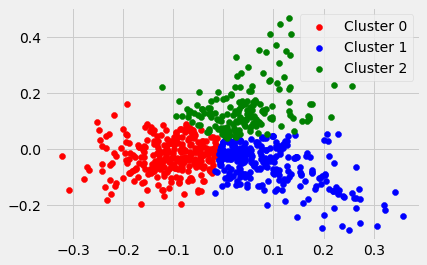

In [ ]:
from matplotlib import pyplot as plt

dfc0 = dfnew[dfnew['klaster']==0]
plt.scatter(dfc0.iloc[:,0],dfc0.iloc[:,1],c="red",label="Cluster 0")
dfc1 = dfnew[dfnew['klaster']==1]
plt.scatter(dfc1.iloc[:,0],dfc1.iloc[:,1],c="blue",label="Cluster 1")
dfc2 = dfnew[dfnew['klaster']==2]
plt.scatter(dfc2.iloc[:,0],dfc2.iloc[:,1],c="green",label="Cluster 2")

plt.legend()
plt.show()

##B. Hasil akhir klastering

In [ ]:
df['klaster'] = label
df

,text,sentiment,klaster
0,"A very, very, very slow-moving, aimless movie ...",0,1
1,Not sure who was more lost - the flat characte...,0,0
2,Attempting artiness with black & white and cle...,0,0
3,Very little music or anything to speak of.,0,1
4,The best scene in the movie was when Gerardo i...,1,0
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,1
744,"Unfortunately, any virtue in this film's produ...",0,2
745,"In a word, it is embarrassing.",0,1
746,Exceptionally bad!,0,1


##C. Menentukan nilai optimal wcss





###metode elbow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.


Text(0, 0.5, 'Nilai wcss')

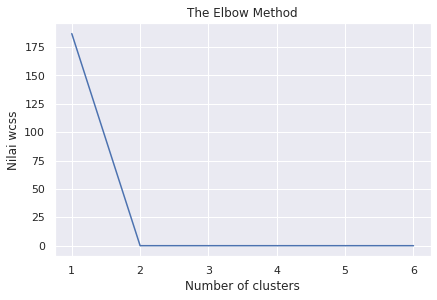

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv('imdb_labelled.txt',sep='\t',names=['text','sentiment'])
data_mapped = data.copy()

x = data_mapped.iloc[:,1:4]


wcss=[]

for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Nilai wcss')